In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import bayes_mvs, norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/test20240319_step7_env905020.csv')
dataset

,Euler1,Euler2,Euler3,default,diffEvol,Anne
0,0,0,0,0.224,0.214,0.244
1,0,0,7,0.202,0.214,0.193
2,0,0,14,0.218,0.214,0.207
3,0,0,21,0.221,0.214,0.183
4,0,0,28,0.210,0.214,0.204
...,...,...,...,...,...,...
4389,84,84,147,0.004,0.003,0.003
4390,84,84,154,0.004,0.004,0.004
4391,84,84,161,0.003,0.003,0.004
4392,84,84,168,0.004,0.004,0.004


In [4]:
dataset[['default', 'diffEvol', 'Anne']].describe()

,default,diffEvol,Anne
count,4394.000000,4394.000000,4394.000000
mean,0.063404,0.093990,0.287888
std,0.441116,0.543916,1.369759
min,0.000000,0.000000,0.000000
25%,0.001000,0.001000,0.001000
50%,0.003000,0.003000,0.003000
75%,0.007000,0.007000,0.010000
max,21.144000,10.731000,26.928000


## Visualize distributions

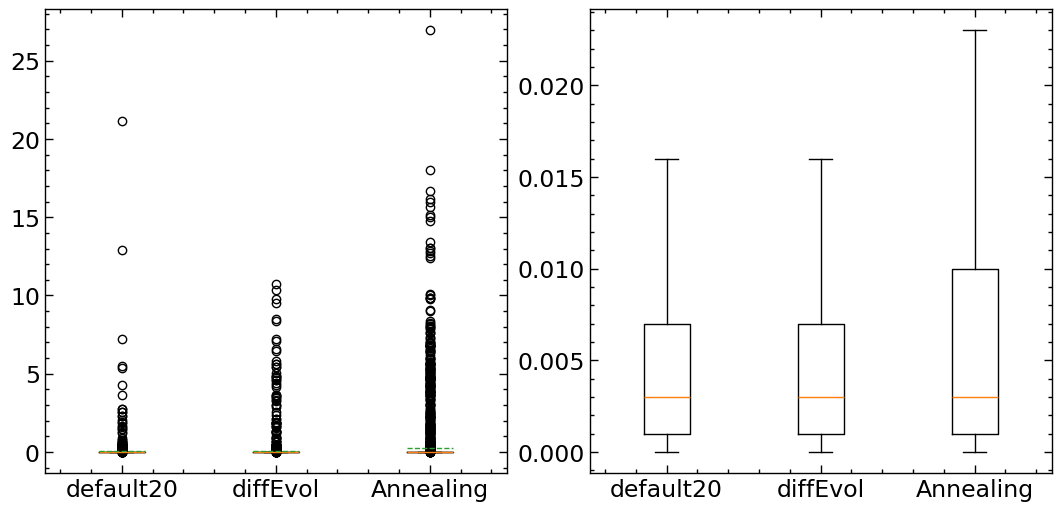

In [5]:
labels = ['default20', 'diffEvol', 'Annealing']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*2.1,5), constrained_layout=True)

ax1.boxplot(dataset[['default', 'diffEvol', 'Anne']], meanline=True, showmeans=True, labels=labels)
_ = ax2.boxplot(dataset[['default', 'diffEvol', 'Anne']], showfliers=False, labels=labels)


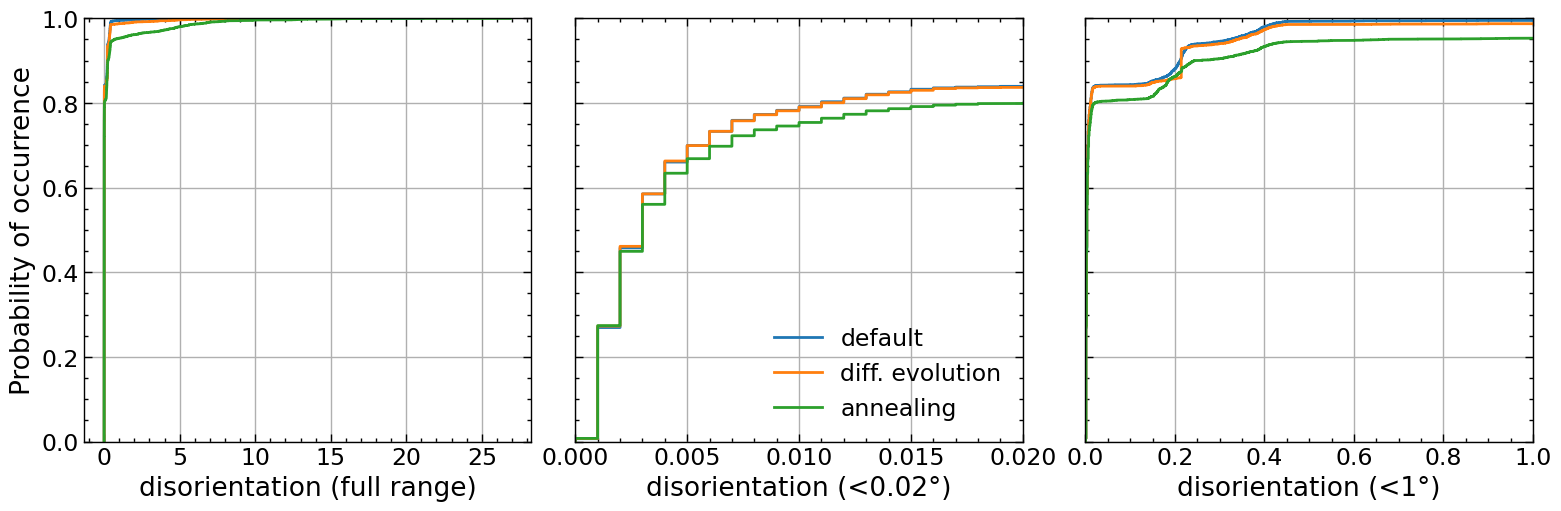

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['default'], label='default')
ax1.ecdf(dataset['diffEvol'], label='diff. evolution')
ax1.ecdf(dataset['Anne'], label='annealing')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")

ax2.ecdf(dataset['default'], label='default')
ax2.ecdf(dataset['diffEvol'], label='diff. evolution')
ax2.ecdf(dataset['Anne'], label='annealing')
ax2.set_xlim(left=0, right=0.02)
ax2.grid(True)
ax2.set_xlabel('disorientation (<0.02°)')
ax2.legend(loc='best')

ax3.ecdf(dataset['default'], label='default')
ax3.ecdf(dataset['diffEvol'], label='diff. evolution')
ax3.ecdf(dataset['Anne'], label='annealing')
ax3.set_xlim(left=0, right=1)
ax3.set_xlabel('disorientation (<1°)')
_ = ax3.grid(True)

In [7]:
mu_default, var_default, std_default = bayes_mvs(dataset['default'], alpha=0.95)
mu_diffEvo, var_diffEvo, std_diffEvo = bayes_mvs(dataset['diffEvol'], alpha=0.95)
mu_duaAnne, var_duaAnne, std_duaAnne = bayes_mvs(dataset['Anne'], alpha=0.95)

print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES')
print()
print('Default algorithm (multiple guesses - 20)')
print(f'Mean: {mu_default[0]:.3f}; min,max: {mu_default[1][0]:.3f}, {mu_default[1][1]:.3f}')
print(f'  SD: {std_default[0]:.3f}; min,max: {std_default[1][0]:.3f}, {std_default[1][1]:.3f}')
print('')
print('Differential evolution algorithm')
print(f'Mean: {mu_diffEvo[0]:.3f}; min,max: {mu_diffEvo[1][0]:.3f}, {mu_diffEvo[1][1]:.3f}')
print(f'  SD: {std_diffEvo[0]:.3f}; min,max: {std_diffEvo[1][0]:.3f}, {std_diffEvo[1][1]:.3f}')
print('')
print('Dual annealing algorithm')
print(f'Mean: {mu_duaAnne[0]:.3f}; min,max: {mu_duaAnne[1][0]:.3f}, {mu_duaAnne[1][1]:.3f}')
print(f'  SD: {std_duaAnne[0]:.3f}; min,max: {std_duaAnne[1][0]:.3f}, {std_duaAnne[1][1]:.3f}')

EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES

Default algorithm (multiple guesses - 20)
Mean: 0.063; min,max: 0.050, 0.076
  SD: 0.441; min,max: 0.432, 0.450

Differential evolution algorithm
Mean: 0.094; min,max: 0.078, 0.110
  SD: 0.544; min,max: 0.532, 0.555

Dual annealing algorithm
Mean: 0.288; min,max: 0.247, 0.328
  SD: 1.370; min,max: 1.341, 1.398


In [8]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [9]:
mid_default, iqr_default, ci_default, length_default = median(dataset['default'])
mid_diffEvo, iqr_diffEvo, ci_diffEvo, length_diffEvo = median(dataset['diffEvol'])
mid_duaAnne, iqr_duaAnne, ci_duaAnne, length_duaAnne = median(dataset['Anne'])

print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print()
print('Default algorithm (multiple guesses - 20)')
print(f'Median: {mid_default:.3f}; min,max: {ci_default}')
print(f'   IQR: {iqr_default:.3f}; length: {length_default:.3f}')
print('')
print('Differential evolution algorithm')
print(f'Median: {mid_diffEvo:.3f}; min,max: {ci_diffEvo}')
print(f'   IQR: {iqr_diffEvo:.3f}; length: {length_diffEvo:.3f}')
print('')
print('Dual annealing algorithm')
print(f'Median: {mid_duaAnne:.3f}; min,max: {ci_duaAnne}')
print(f'   IQR: {iqr_duaAnne:.3f}; length: {length_duaAnne:.3f}')

EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

Default algorithm (multiple guesses - 20)
Median: 0.003; min,max: (0.003, 0.003)
   IQR: 0.006; length: 0.000

Differential evolution algorithm
Median: 0.003; min,max: (0.003, 0.003)
   IQR: 0.006; length: 0.000

Dual annealing algorithm
Median: 0.003; min,max: (0.003, 0.003)
   IQR: 0.009; length: 0.000


In [10]:
print('Wrong estimates:')
print(f"Percent above 1 degree (default: 20): {100 * (dataset['default'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (diff. Evol):  {100 * (dataset['diffEvol'] > 1).mean():.1f} %")
print(f"Percent above 1 degree (Annealing):   {100 * (dataset['Anne'] > 1).mean():.1f} %")

Wrong estimates:
Percent above 1 degree (default: 20): 0.5 %
Percent above 1 degree (diff. Evol):  1.3 %
Percent above 1 degree (Annealing):   4.7 %


In [11]:
dataset[dataset['default'] > 1]

,Euler1,Euler2,Euler3,default,diffEvol,Anne
30,0,7,28,2.584,3.329,0.144
54,0,14,14,3.674,3.675,0.022
77,0,14,175,12.911,0.145,0.001
521,7,49,7,5.466,0.010,0.011
599,7,70,7,21.144,0.013,0.012
703,14,7,7,1.473,0.874,0.006
1061,21,7,147,2.531,0.005,2.494
1719,35,7,21,2.725,0.003,3.331
1722,35,7,42,2.023,0.002,5.381
1740,35,7,168,1.465,0.003,0.003


In [12]:
# check when all the algorithms failed
dataset.query('default > 1 and diffEvol > 1 and Anne > 1')

,Euler1,Euler2,Euler3,default,diffEvol,Anne
4159,84,21,175,1.881,1.882,1.269


In [13]:
100 - (100 * 1 / 4394)

99.97724169321802

In [14]:
# check when default20 and differential evolution both failed
dataset[(dataset['default'] > 1) & (dataset['diffEvol'] > 1)]

,Euler1,Euler2,Euler3,default,diffEvol,Anne
30,0,7,28,2.584,3.329,0.144
54,0,14,14,3.674,3.675,0.022
3795,77,14,175,1.279,1.279,0.742
4102,84,7,140,5.389,5.459,0.011
4133,84,14,175,1.591,1.245,0.317
4159,84,21,175,1.881,1.882,1.269
4211,84,35,175,7.222,3.244,0.001


In [15]:
# check when default20 and dual annealing both failed
dataset[(dataset['default'] > 1) & (dataset['Anne'] > 1)]

,Euler1,Euler2,Euler3,default,diffEvol,Anne
1061,21,7,147,2.531,0.005,2.494
1719,35,7,21,2.725,0.003,3.331
1722,35,7,42,2.023,0.002,5.381
4105,84,7,161,1.240,0.015,2.492
4132,84,14,168,1.924,0.006,3.054
4159,84,21,175,1.881,1.882,1.269


In [16]:
dataset[(dataset['diffEvol'] > 1) & (dataset['Anne'] > 1)]

,Euler1,Euler2,Euler3,default,diffEvol,Anne
370,7,7,42,0.013,4.884,6.366
706,14,7,28,0.005,3.565,5.934
707,14,7,35,0.005,4.297,6.820
1407,28,14,21,0.003,5.623,10.038
1410,28,14,42,0.002,9.785,4.637
1717,35,7,7,0.003,1.019,2.031
1746,35,14,28,0.002,7.092,7.039
1793,35,21,175,0.001,2.111,15.662
3457,70,14,175,0.003,1.332,1.332
3765,77,7,147,0.007,4.611,1.490


In [17]:
# comparative = dataset[['default', 'diffEvol', 'Anne']].melt(var_name='algorithm', value_name='disorientation')

In [18]:
# fig2, ax = plt.subplots()

# # Plot the violin
# ax = sns.violinplot(
#     y="disorientation", x="algorithm", data=comparative, scale="count", inner=None, cut=0
# )
